In [1]:
# добавления пути до модуля spin_nn
import sys
import os

project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_path not in sys.path:
    sys.path.append(project_path)

## ОБУЧЕНИЕ стекла на MNIST датасете

In [2]:
from spin_nn.model import MSKModel
from spin_nn.utils import load_mnist
from spin_nn.training import train_model
from spin_nn.visualization import plot_training_loss

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [3]:
X_train, X_test, y_train, y_test = load_mnist()

In [4]:
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()

# Преобразуем данные в нужный тип (float32)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [5]:
print(X_train.shape, X_train.dtype)  # Ожидаем (N, 784), dtype=float32
print(y_train.shape, y_train.dtype)  # Ожидаем (N,), dtype=int32

(56000, 784) float32
(56000,) int32


In [6]:
n_layers = 3
layer_sizes = [784, 128, 10]  # Input (784), Hidden (128), Output (10 classes)
beta = 1.0

In [ ]:

model = MSKModel(n_layers=n_layers, layer_sizes=layer_sizes, beta=beta)
init_weights = model.initialize_weights()

[array([[-0.01405506, -0.06224255, -0.03454854, ...,  0.01054223,
          0.04214835,  0.00666044],
        [-0.02365838, -0.00269039,  0.05762527, ..., -0.00649671,
          0.0378901 ,  0.01849158],
        [ 0.04003916, -0.02099311, -0.089184  , ...,  0.03505131,
          0.02756495, -0.00730227],
        ...,
        [-0.02608742,  0.05039132,  0.01850825, ...,  0.03842359,
          0.11533413,  0.00093795],
        [-0.02504241,  0.01314594,  0.0585325 , ..., -0.00852087,
         -0.00200219,  0.00898557],
        [-0.02036455,  0.00215526,  0.01630104, ..., -0.0632869 ,
         -0.03372616,  0.04347274]], shape=(784, 128)),
 array([[-0.03981171,  0.07757208, -0.0142389 , ...,  0.09811887,
          0.03854476, -0.15727845],
        [-0.04952554, -0.05861874, -0.01483214, ..., -0.11719275,
          0.06674803, -0.22537441],
        [ 0.08243482,  0.05470525,  0.18832054, ...,  0.0611137 ,
         -0.01230123,  0.00523932],
        ...,
        [ 0.04761534,  0.06656585, -

In [ ]:
epochs = 10
learning_rate = 0.01

losses = train_model(model, X_train, y_train, X_test, y_test, epochs=epochs, learning_rate=learning_rate)

Epoch 1/10, Loss: 12.1656
Epoch 2/10, Loss: 17.1148
Epoch 3/10, Loss: 17.2154
Epoch 4/10, Loss: 17.2095
Epoch 5/10, Loss: 17.3184
Epoch 6/10, Loss: 17.3908
Epoch 7/10, Loss: 17.3033
Epoch 8/10, Loss: 17.1062
Epoch 9/10, Loss: 17.1622
Epoch 10/10, Loss: 17.2036


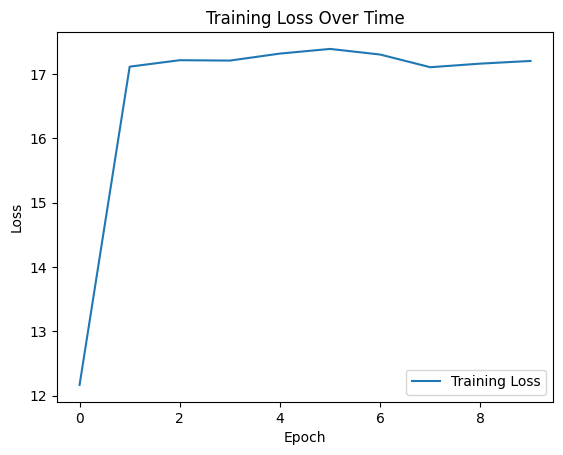

In [9]:

plot_training_loss(losses)